In [1]:
%load_ext autoreload
%autoreload 2

import os
import warnings

warnings.filterwarnings("ignore")
os.chdir("../")

In [2]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
from analysis import load_nft_trades, load_trades, outlier_aware_hist

In [3]:
import datetime

In [12]:
nft_trades = load_nft_trades()

In [4]:
trades = load_trades()

In [17]:
y.corr(x)

-0.36309647820456775

In [42]:
y

collection
Async Art                                           53954.61
CryptoArte                                          16935.81
Hello, i'm Victor FEWOCiOUS And This is My Life!    71103.65
SUPERPLASTIC: SUPERGUCCI                            14695.95
Name: sum, dtype: float64

In [67]:
grouped_trades.index[-1]

datetime.date(2022, 10, 4)

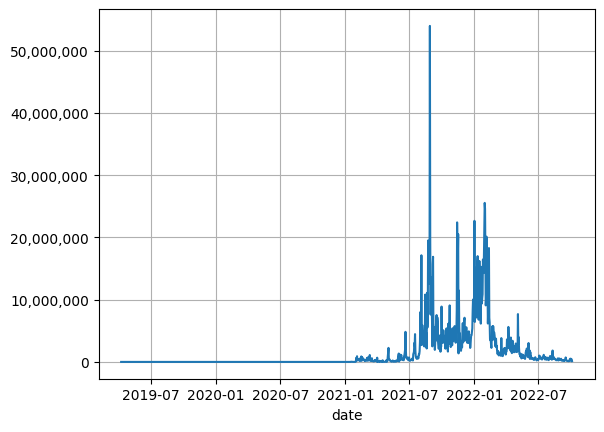

In [24]:
trades.groupby("date").sum()["price_usd"].plot()
plt.grid()
fmt = "{x:,.0f}"
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

In [42]:
grouped_trades["Count of Trades"].iloc[-1]

13311.0

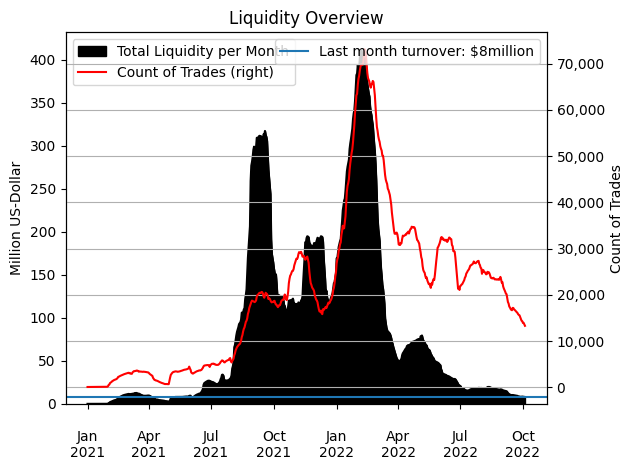

In [41]:
grouped_trades = (
    trades.groupby("date")
    .agg(["sum", "count"])["price_usd"]
    .rolling(30)
    .sum()
    .loc[datetime.date(2021, 1, 1) :]
)
# grouped_trades["x"] = grouped_trades["count"]
grouped_trades["Total Liquidity per Month"] = grouped_trades["sum"] / 1000000
grouped_trades["Count of Trades"] = grouped_trades["count"].copy()
grouped_trades.plot.area(
    y="Total Liquidity per Month",
    color="black",
    ylabel="Million US-Dollar",
    xlabel="",
    title="Liquidity Overview",
)
ax = plt.gca()
ax2 = grouped_trades.plot.line(
    y="Count of Trades",
    color="red",
    ylabel="Count of Trades",
    xlabel="",
    title="Liquidity Overview",
    secondary_y=True,
    ax=ax
)
ax.xaxis.set_major_formatter(mdates.DateFormatter("\n%b\n%Y"))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax3 = ax.axhline(
    grouped_trades["Total Liquidity per Month"].iloc[-1],
    label=f"Last month turnover: $"
    + str(int(grouped_trades["Total Liquidity per Month"].iloc[-1]))
    + "million",
)

plt.legend(handles=[ax, ax2, ax3], labels=[ax.get_label(),ax2.get_label(),ax3.get_label()],loc="upper right")
plt.tight_layout()
plt.grid()
fmt = "{x:,.0f}"
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
plt.savefig("figures/liquidity.png")

<AxesSubplot: xlabel='count', ylabel='sum'>

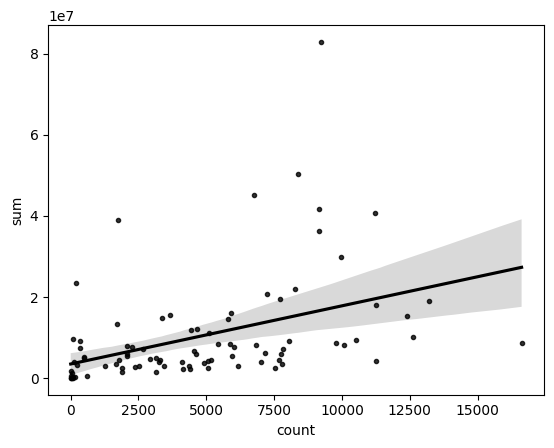

In [45]:
grouped_trades = (
    trades.groupby("collection")
    .agg(["sum", "count"])["price_usd"]
    .query("sum < 200000000")
)
x = grouped_trades["count"]
y = grouped_trades["sum"]

sns.regplot(x=x, y=y, order=1, marker=".", color="black")

In [4]:
nft_trades.head()

,,purchase_date,sell_date,holding_period,purchase_price_eth,sell_price_eth,profit_eth,purchase_price_usd,sell_price_usd,profit_usd,collection,from_address,to_address,purchase_hash,sell_hash
nft_id,trade_no,,,,,,,,,,,,,,
0xmons.xyz_103,1,2021-03-14,2021-08-01,140,6.00,5.000,-0.166667,11092.14,12782.05,0.152352,0xmons.xyz,0xfaf1031b02a994b80f12cc1ee4c0dcebbb946aa0,0x73ffce54ce7d21397a7932d9bc2a7e013ff30902,0xb4f8ec6ac9cd76de994c2912923ea09e0094be165913...,0x8a3fb6eec565e1f997881ea2b40bd778f21cf3f50fd8...
0xmons.xyz_118,1,2021-04-01,2021-12-04,247,7.99,12.000,0.501877,15721.68,49491.12,2.147954,0xmons.xyz,0x2117c37a65ad3c0489682386f7d81d4c6d08b3c8,0x947e1bbcbf8a67a9f7a393adf93179baaf0cccdc,0xa8cf0256bfcf5359365bd360f94cd6f76ba52c0b2053...,0xbccbf4cae59258731825c74cf7cad7243663732bfb77...
0xmons.xyz_126,1,2021-03-11,2021-08-07,149,5.55,7.770,0.400000,10140.18,24572.08,1.423239,0xmons.xyz,0xfaf1031b02a994b80f12cc1ee4c0dcebbb946aa0,0xd6d7ea4833f22edbed3dbd3d71adf3cdd8e36a01,0xaf9ca732b6ee7f0814705b68e814ce5e2e30d534ae8e...,0xb0c5c0bdd560e2c7cfac59029e705496cf4bb575b38e...
0xmons.xyz_127,1,2022-01-01,2022-02-12,42,21.00,19.069,-0.091952,79101.54,55649.83,-0.296476,0xmons.xyz,0x7260f7927a25949c15b7c4cbcf936510bf34c81b,0xb96a4bc4ae0bad1043feb96147fc18b17176b138,0xebb2398cdbdc822e695b4fafc8cf8604c18a609cef81...,0x7438a5d06720f8f25008807513476862965a7e2374d5...
0xmons.xyz_129,1,2021-02-20,2021-09-17,209,9.99,21.000,1.102102,19132.05,71375.22,2.730662,0xmons.xyz,0x11df180d9bdbe90fa51898b3d59959549d589426,0x7ce06dfb89aadec277f34fc575b3d735c593354e,0x2524b8a284df2f40fa885a071a4ad8e1cb515803d114...,0xa340d0c3b80a77b1d4de8beaeb17565dbd7e3eeefa84...


# Correlations

In [5]:
nft_trades.corr().loc["profit_usd", "holding_period"]

0.011342925388377261

In [6]:
from analysis import outlier_aware_hist

In [7]:
sell_date = (
    nft_trades.groupby("sell_date").agg(["count", "median", "mean"])["profit_usd"]
    # .query("median < 10")
    .reset_index()
)

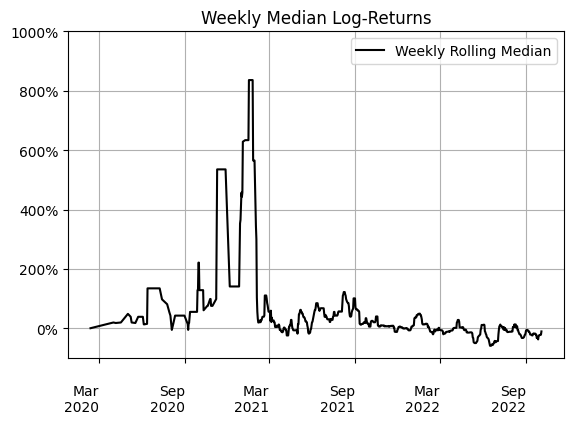

In [8]:
plot_df = (
    sell_date.set_index("sell_date")
    .rolling(7)
    .median()
    .dropna()["median"]
    .rename("Weekly Rolling Median")
)

plot_df[0] = 0
ax = plot_df.plot(
    color="black", xlabel="", title="Weekly Median Log-Returns", ylim=(-1, 10)
)
plt.grid()

ax.xaxis.set_major_locator(mdates.MonthLocator([3, 9]))
plt.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter("\n%b\n%Y"))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.savefig("figures/rolling_weekly.png")

In [4]:
spx = pd.read_csv("historic_data/spx.csv")
spx = spx.assign(Date=pd.to_datetime(spx.Date)).set_index("Date")

In [24]:
nft_trades.query("profit_usd < 100")["profit_usd"].median()

0.0317415887588872

In [17]:
(nft_index.median() - 0.02) / nft_index.std()

-0.001453643528036358

In [55]:
spx.iloc[150]

spx    2826.15
Name: 2019-06-05 00:00:00, dtype: float64

In [56]:
(spx.iloc[150:].pct_change().cumsum().iloc[-1]["spx"] - 0.02) / spx.iloc[150:].pct_change().cumsum().std()

spx    1.774032
dtype: float64

In [10]:
eth_usd = pd.read_csv("historic_data/eth_usd.csv")
eth_usd = eth_usd.assign(Date=pd.to_datetime(eth_usd.Date)).set_index("Date")

In [13]:
nft_index = nft_trades.groupby("sell_date").median().pct_change()["sell_price_usd"]

In [12]:
market = spx.merge(eth_usd, how="inner", left_index=True, right_index=True).pct_change()
market.iloc[0] = [1, 1]
market = market.merge(nft_index, how="inner", left_index=True, right_index=True)

market = market.rolling(7).median().dropna()
market.iloc[0] = [1, 1, 1]
market = market.cumsum()  # .sub(1)

market = market.rename(
    columns={
        "spx": "S&P 500",
        "ETH_in_USD": "ETH/USD",
        "sell_price_usd": "NFT Art Index",
    }
)

In [13]:
market

,S&P 500,ETH/USD,NFT Art Index
2020-04-06,1.000000,1.000000,1.000000
2020-04-17,1.003862,1.015271,0.627147
2020-05-08,1.010325,1.030541,0.254295
2020-05-18,1.027196,1.069412,0.625967
2020-06-01,1.044068,1.166079,0.598328
...,...,...,...
2022-09-28,1.145763,1.694317,6.031010
2022-09-29,1.135423,1.694754,6.155650
2022-09-30,1.125082,1.695191,6.280289
2022-10-03,1.114742,1.693875,6.404929


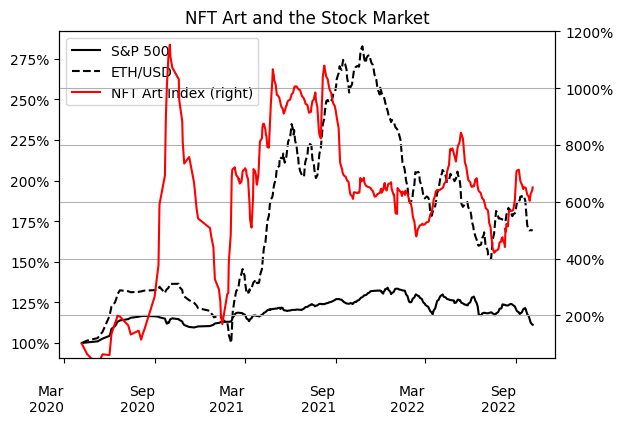

In [14]:
ax = market[["S&P 500"]].plot(grid=True, color="black")
market[["ETH/USD"]].plot(ax=ax, color="black", linestyle="--")
ax2 = market[["NFT Art Index"]].plot(
    ax=ax, secondary_y=True, ylim=(0.5, 12), color="red", grid=True
)

ax.xaxis.set_major_locator(mdates.MonthLocator([3, 9]))
ax.xaxis.set_major_formatter(mdates.DateFormatter("\n%b\n%Y"))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().set_title("NFT Art and the Stock Market")
plt.savefig("figures/nft_index.png")

In [15]:
market.iloc[-1]

S&P 500          1.112621
ETH/USD          1.692559
NFT Art Index    6.506119
Name: 2022-10-04 00:00:00, dtype: float64

In [16]:
market_norm = (market - market.mean()) / market.std()

In [17]:
market_norm_plot = market_norm.copy()

In [18]:
market_norm_plot.iloc[0] = [1, 1, 1]
market_norm_plot = market_norm_plot.cumsum().sub(1)

[Text(18322.0, 0, '\nMar\n2020'),
 Text(18506.0, 0, '\nSep\n2020'),
 Text(18687.0, 0, '\nMar\n2021'),
 Text(18871.0, 0, '\nSep\n2021'),
 Text(19052.0, 0, '\nMar\n2022'),
 Text(19236.0, 0, '\nSep\n2022')]

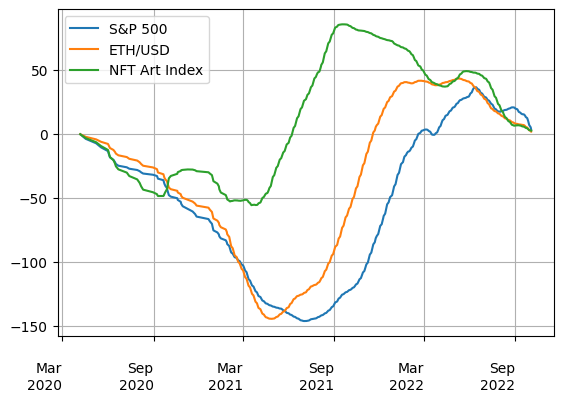

In [19]:
ax = market_norm_plot.plot(grid=True)
ax.xaxis.set_major_locator(mdates.MonthLocator([3, 9]))
ax.xaxis.set_major_formatter(mdates.DateFormatter("\n%b\n%Y"))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0)

In [20]:
correl_matrix = market_norm.corr("pearson")

In [21]:
from analysis import plot_correl_heatmap

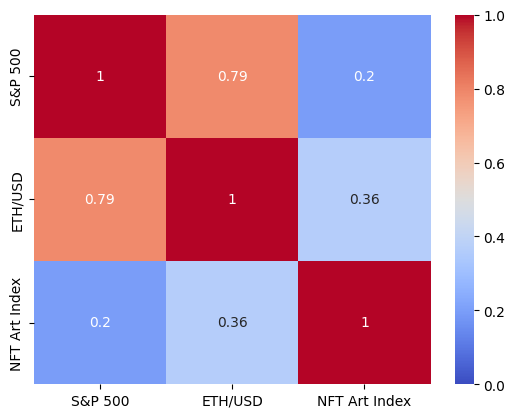

In [22]:
plot_correl_heatmap(correl_matrix)

In [23]:
weekly_eth_usd = eth_usd.rolling(7).median().dropna()
weekly_spx = spx.rolling(7).median().dropna()
weekly_nft_index = (
    sell_date.set_index("sell_date")
    .rolling(7)
    .median()
    .dropna()[["median"]]
    .rename(columns={"median": "nft_index"})
)

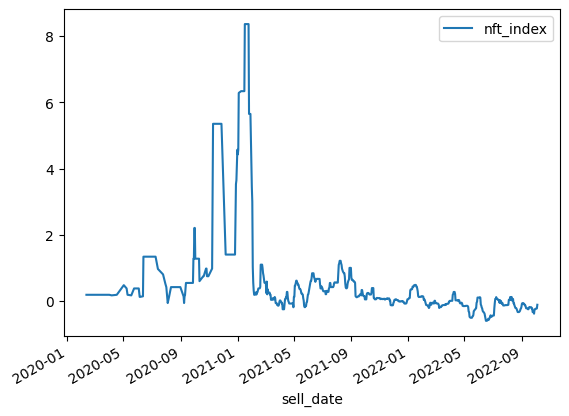

In [24]:
ax = weekly_nft_index.plot()

In [25]:
market = spx.merge(eth_usd, how="inner", left_index=True, right_index=True).merge(
    sell_date.set_index("sell_date")[["median"]],
    how="inner",
    left_index=True,
    right_index=True,
)

In [57]:
plot_market_df = (
    market.pct_change()
    .rolling(7)
    .median()
    .dropna()
    .rename(
        columns={"spx": "S&P 500", "ETH_in_USD": "ETH/USD", "median": "NFT Art Index"}
    )
)
ax = plot_market_df.plot(grid=True)
ax.xaxis.set_major_locator(mdates.MonthLocator([3, 9]))
plt.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter("\n%b\n%Y"))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

NameError: name 'market' is not defined

In [26]:
plot_market_df.corr()

NameError: name 'plot_market_df' is not defined

In [ ]:
nft_trades

In [27]:
holding_period = (
    nft_trades.groupby("holding_period")
    .agg(["count", "median", "mean"])["profit_usd"]
    .query("median < 10")
    .reset_index()
)

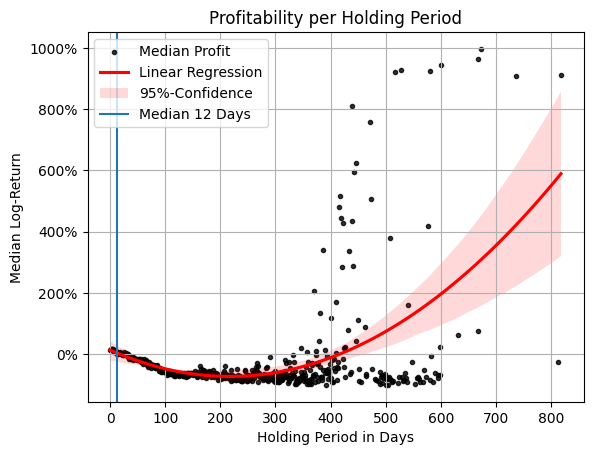

In [28]:
ax = sns.regplot(
    x=holding_period["holding_period"],
    y=holding_period["median"],
    # robust=True,
    marker=".",
    scatter_kws={"color": "black"},
    line_kws={"color": "red"},
    ci=95,
    order=2,
)
plt.grid()
plt.axvline(
    nft_trades["holding_period"].median(),
    label=f"Median {int(nft_trades.holding_period.median())} Days",
)
ax.set_xlabel("Holding Period in Days")
ax.set_ylabel("Median Log-Return")
ax.set_title("Profitability per Holding Period")
plt.legend(["Median Profit", "Linear Regression", "95%-Confidence", "Median 12 Days"])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.savefig("figures/profit_per_holding_period.png")

In [29]:
nft_trades[nft_trades["holding_period"] == 0].count()["holding_period"] / nft_trades[
    nft_trades["holding_period"] != 0
].count()["holding_period"]

0.11286048578440565

In [30]:
collection_count = (
    nft_trades.groupby("collection")
    .agg(["count", "median", "mean"])["profit_usd"]
    .query("median < 10")
)

In [31]:
collection_count = collection_count.groupby("count").mean().reset_index()

In [32]:
collection_count["median"].corr(collection_count["count"])

-0.01494767057696642

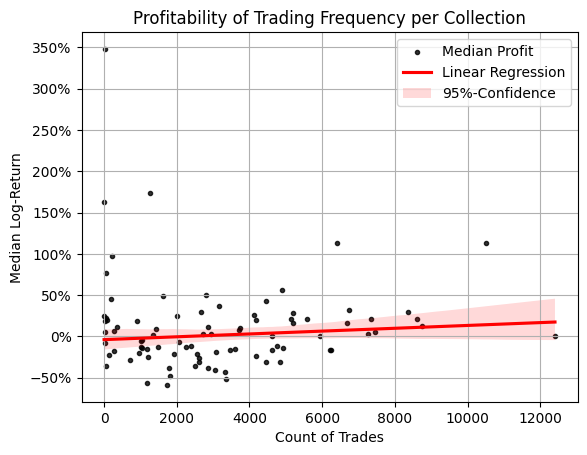

In [33]:
ax = sns.regplot(
    x=collection_count["count"],
    y=collection_count["median"],
    robust=True,
    marker=".",
    scatter_kws={"color": "black"},
    line_kws={"color": "red"},
)
plt.grid()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel("Count of Trades")
ax.set_ylabel("Median Log-Return")
ax.set_title("Profitability of Trading Frequency per Collection")
plt.legend(["Median Profit", "Linear Regression", "95%-Confidence"])
plt.savefig("figures/profit_per_collection_trades.png")

In [34]:
address_count = (
    nft_trades.groupby("from_address")
    .agg(["count", "median", "mean", "sum"])["profit_usd"]
    .query("mean < 10")
)

In [35]:
address_count = address_count.groupby("count").mean().reset_index()

In [36]:
address_count

,count,median,mean,sum
0,1,0.433136,0.433136,0.433136
1,2,0.421425,0.421425,0.842849
2,3,0.219311,0.453062,1.359185
3,4,0.272492,0.520395,2.081579
4,5,0.207260,0.545757,2.728786
...,...,...,...,...
108,245,-0.055556,-0.167021,-40.920229
109,291,-0.414974,-0.293963,-85.543212
110,297,0.000000,0.039964,11.869386
111,510,-0.017845,-0.038334,-19.550541


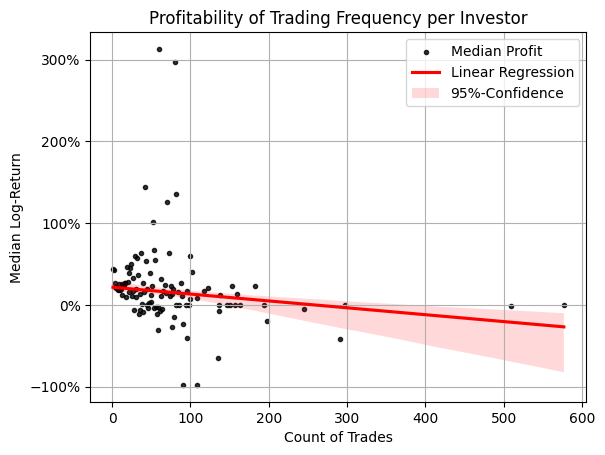

In [37]:
ax = sns.regplot(
    x=address_count["count"],
    y=address_count["median"],
    robust=True,
    marker=".",
    scatter_kws={"color": "black"},
    line_kws={"color": "red"},
    label="test",
    # order=2
)
plt.grid()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel("Count of Trades")
ax.set_ylabel("Median Log-Return")
ax.set_title("Profitability of Trading Frequency per Investor")
plt.legend(["Median Profit", "Linear Regression", "95%-Confidence"])
plt.savefig("figures/profit_per_investor_trades.png")

In [38]:
nft_trades

,,purchase_date,sell_date,holding_period,purchase_price_eth,sell_price_eth,profit_eth,purchase_price_usd,sell_price_usd,profit_usd,collection,from_address,to_address,purchase_hash,sell_hash
nft_id,trade_no,,,,,,,,,,,,,,
0xmons.xyz_103,1,2021-03-14,2021-08-01,140,6.00,5.000,-0.166667,11092.14,12782.05,0.152352,0xmons.xyz,0xfaf1031b02a994b80f12cc1ee4c0dcebbb946aa0,0x73ffce54ce7d21397a7932d9bc2a7e013ff30902,0xb4f8ec6ac9cd76de994c2912923ea09e0094be165913...,0x8a3fb6eec565e1f997881ea2b40bd778f21cf3f50fd8...
0xmons.xyz_118,1,2021-04-01,2021-12-04,247,7.99,12.000,0.501877,15721.68,49491.12,2.147954,0xmons.xyz,0x2117c37a65ad3c0489682386f7d81d4c6d08b3c8,0x947e1bbcbf8a67a9f7a393adf93179baaf0cccdc,0xa8cf0256bfcf5359365bd360f94cd6f76ba52c0b2053...,0xbccbf4cae59258731825c74cf7cad7243663732bfb77...
0xmons.xyz_126,1,2021-03-11,2021-08-07,149,5.55,7.770,0.400000,10140.18,24572.08,1.423239,0xmons.xyz,0xfaf1031b02a994b80f12cc1ee4c0dcebbb946aa0,0xd6d7ea4833f22edbed3dbd3d71adf3cdd8e36a01,0xaf9ca732b6ee7f0814705b68e814ce5e2e30d534ae8e...,0xb0c5c0bdd560e2c7cfac59029e705496cf4bb575b38e...
0xmons.xyz_127,1,2022-01-01,2022-02-12,42,21.00,19.069,-0.091952,79101.54,55649.83,-0.296476,0xmons.xyz,0x7260f7927a25949c15b7c4cbcf936510bf34c81b,0xb96a4bc4ae0bad1043feb96147fc18b17176b138,0xebb2398cdbdc822e695b4fafc8cf8604c18a609cef81...,0x7438a5d06720f8f25008807513476862965a7e2374d5...
0xmons.xyz_129,1,2021-02-20,2021-09-17,209,9.99,21.000,1.102102,19132.05,71375.22,2.730662,0xmons.xyz,0x11df180d9bdbe90fa51898b3d59959549d589426,0x7ce06dfb89aadec277f34fc575b3d735c593354e,0x2524b8a284df2f40fa885a071a4ad8e1cb515803d114...,0xa340d0c3b80a77b1d4de8beaeb17565dbd7e3eeefa84...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
merge._9699,1,2022-03-23,2022-04-05,13,0.32,0.660,1.062500,970.55,2248.28,1.316501,merge.,0x6dd08442bc838b1c5910cd7f2bee63a14ad72e9e,0x7f65e4b247cc5af02dbb1dd662f1108ab7d5bd06,0x579332ccc1132ad4e3fcec56ee8eda850a5ba72efb68...,0xcd4bb08b13757b359711909644e622d3db45697e6a18...
merge._9700,1,2022-04-02,2022-07-16,105,0.30,0.169,-0.436667,1033.40,229.22,-0.778189,merge.,0xb0caa42e5b72304d55c02ec5ba775b77ebd5a594,0x4732813543861417424375167906559975250524,0x0c73239ad581a2c9ce67fdb111568ff16865d575fc37...,0x5e88ff106210d5ccd2fe2802647dcea5b4e6b0e7b2ce...
merge._9706,1,2021-12-15,2021-12-15,0,0.50,0.579,0.158000,2010.10,2327.69,0.157997,merge.,0x410de717fe008cd5c82916485a1049864066e0c8,0xf4fede498847004d74664f5b496334e966152cc2,0x9f04c8d9dd41ea6d73abc5e8b7c0af957dc1f150ba67...,0x6b53499afc62d18494dcd0081cb26fdf6904287e597c...


In [39]:
i = -1
profit_splits = [
    -0.5,
    0,
    0.5,
    1,
    2,
    3,
    4,
    5,
    10,
    100,
    np.inf,
]
profit_dict, std_dict = {}, {}
for profit in profit_splits:
    max_profit, min_profit = profit, i
    profit_count = (
        nft_trades.groupby("from_address")
        .median()
        .query(f"{max_profit} > profit_usd >= {min_profit}")["profit_usd"]
        .count()
    )
    profit_dict[(min_profit, max_profit)] = profit_count

    i = profit
profit = pd.DataFrame(
    profit_dict.values(), columns=["Count of Addresses"], index=profit_dict.keys()
)


def format(x):
    if x != np.inf:
        x = f"{int(x*100)}%"
    return x


level_0 = profit.reset_index()["level_0"].apply(lambda x: format(x))
level_1 = profit.reset_index()["level_1"].apply(lambda x: format(x))
profit = profit.set_index([level_0, level_1])

color_list = []
for profit_split in profit_splits[:2]:
    color_list.append("red")
for profit_split in profit_splits[2:]:
    color_list.append("green")

In [40]:
from matplotlib.ticker import FuncFormatter

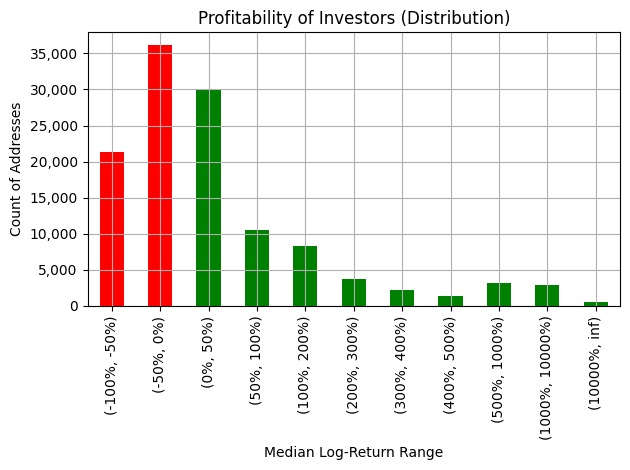

In [41]:
ax = profit["Count of Addresses"].plot.bar(
    grid=True,
    color=color_list,
    ylabel="Count of Addresses",
    xlabel="Median Log-Return Range",
    title="Profitability of Investors (Distribution)",
)
fmt = "{x:,.0f}"
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.tight_layout()
plt.savefig("figures/profit_per_investor.png")

In [42]:
i = 0
price_splits = [
    100,
    1000,
    5000,
    10000,
    15000,
    20000,
    25000,
    50000,
    100000,
    200000,
    500000,
    np.inf,
]
profit_dict, std_dict = {}, {}
for price in price_splits:
    max_price, min_price = price, i
    purchase_price_median = nft_trades.query(
        f"{max_price} > purchase_price_usd > {min_price}"
    )["profit_usd"].median()
    purchase_price_std = nft_trades.query(
        f"{max_price} > purchase_price_usd > {min_price}"
    )["profit_usd"].std()
    profit_dict[(min_price, max_price)] = purchase_price_median
    std_dict[(min_price, max_price)] = purchase_price_std

    i = price
profit = pd.DataFrame(
    profit_dict.values(), columns=["Median Profit"], index=profit_dict.keys()
)
std = pd.DataFrame(
    std_dict.values(), columns=["Standard Deviation"], index=std_dict.keys()
)
profit_cluster = pd.concat([profit, std], axis=1).reset_index()
profit_cluster["positive_return"] = profit_cluster["Median Profit"].apply(
    lambda x: (True) if x >= 0 else (False)
)
color_dict = {True: "green", False: "red"}


def format(x):
    if x != np.inf:
        x = "{:,}".format(x)
    return x

In [43]:
format(10000)

'10,000'

In [44]:
profit_cluster["buy_0"] = profit_cluster.reset_index()["level_0"].apply(
    lambda x: format(x)
)
profit_cluster["buy_1"] = profit_cluster.reset_index()["level_1"].apply(
    lambda x: format(x)
)
profit_cluster = profit_cluster.set_index(["buy_0", "buy_1"])

In [45]:
profit_cluster

,,level_0,level_1,Median Profit,Standard Deviation,positive_return
buy_0,buy_1,,,,,
0,100.0,0,100.0,1.176375,3693.231665,True
100,"1,000.0",100,1000.0,0.136003,33.806815,True
"1,000","5,000.0",1000,5000.0,-0.106641,10.160515,False
"5,000","10,000.0",5000,10000.0,-0.214891,4.959851,False
"10,000","15,000.0",10000,15000.0,-0.130186,4.151441,False
"15,000","20,000.0",15000,20000.0,-0.295285,3.707780,False
"20,000","25,000.0",20000,25000.0,-0.054924,3.665870,False
"25,000","50,000.0",25000,50000.0,0.290598,2.723272,True
"50,000","100,000.0",50000,100000.0,0.747164,2.202731,True


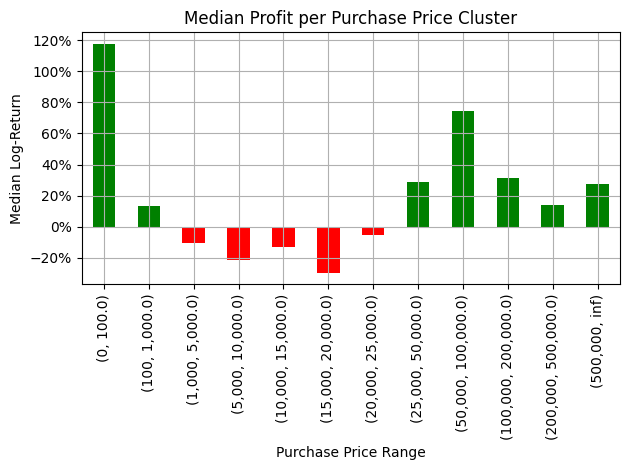

In [46]:
ax = profit_cluster["Median Profit"].plot.bar(
    grid=True,
    color=[color_dict[r] for r in profit_cluster["positive_return"]],
    ylabel="Median Log-Return",
    title="Median Profit per Purchase Price Cluster",
    xlabel="Purchase Price Range",
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.savefig("figures/profit_per_price.png")

In [47]:
rf = 0.02
profit_cluster["risk_return"] = (profit_cluster["Median Profit"] - rf) / profit_cluster[
    "Standard Deviation"
]

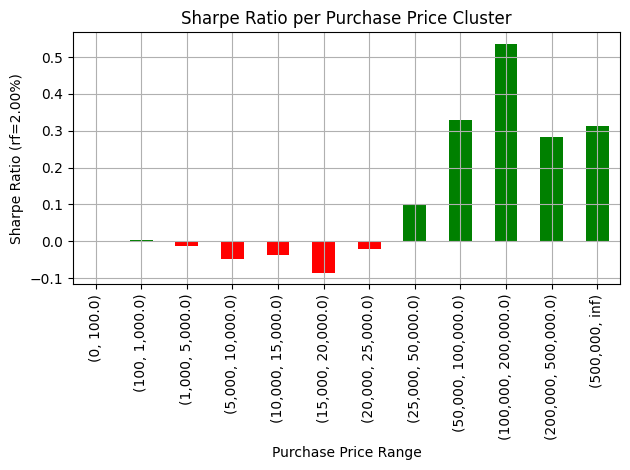

In [48]:
risk_return_cluster = profit_cluster  # .sort_values("risk_return", ascending=False)
ax = risk_return_cluster["risk_return"].plot.bar(
    grid=True,
    color=[color_dict[r] for r in risk_return_cluster["positive_return"]],
    title="Sharpe Ratio per Purchase Price Cluster",
    ylabel="Sharpe Ratio (rf=2.00%)",
    xlabel="Purchase Price Range",
)
# ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.savefig("figures/sharpe_ratio_per_purchase_price.png")

In [49]:
risk_return_cluster

,,level_0,level_1,Median Profit,Standard Deviation,positive_return,risk_return
buy_0,buy_1,,,,,,
0,100.0,0,100.0,1.176375,3693.231665,True,0.000313
100,"1,000.0",100,1000.0,0.136003,33.806815,True,0.003431
"1,000","5,000.0",1000,5000.0,-0.106641,10.160515,False,-0.012464
"5,000","10,000.0",5000,10000.0,-0.214891,4.959851,False,-0.047358
"10,000","15,000.0",10000,15000.0,-0.130186,4.151441,False,-0.036177
"15,000","20,000.0",15000,20000.0,-0.295285,3.707780,False,-0.085033
"20,000","25,000.0",20000,25000.0,-0.054924,3.665870,False,-0.020438
"25,000","50,000.0",25000,50000.0,0.290598,2.723272,True,0.099365
"50,000","100,000.0",50000,100000.0,0.747164,2.202731,True,0.330119


# Regression with Holding Days, Purchase Price, ETH Price, 

In [50]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [51]:
# nft_trades = nft_trades[nft_trades["profit_usd"] < 1]

In [52]:
nft_trades["eth_usd"] = (
    nft_trades["purchase_price_usd"] / nft_trades["purchase_price_eth"]
)

# Splitting data set
x = nft_trades[["holding_period", "purchase_price_usd", "eth_usd"]]
y = nft_trades["profit_usd"]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=100
)

# Fitting the Multiple Linear Regression model
mlr = LinearRegression()
mlr.fit(x_train, y_train)

# Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

# Prediction of test set
y_pred_mlr = mlr.predict(x_test)
# Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

# Actual value and the predicted value
mlr_diff = pd.DataFrame({"Actual value": y_test, "Predicted value": y_pred_mlr})
mlr_diff.head()

# Model Evaluation
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

Intercept:  16.438269292214024
Coefficients:
Prediction for test set: [12.7841808  -2.20639799 -0.49968613 ... 52.33574454  3.24490697
 12.16671957]


In [53]:
# add constant to predictor variables
x = sm.add_constant(x)

# fit linear regression model
model = sm.OLS(y, x).fit()

In [54]:
for table in model.summary().tables:
    print(table.as_latex_tabular())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &   profit\_usd    & \textbf{  R-squared:         } &      0.000   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &      0.000   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &      13.70   \\
\textbf{Date:}             & Sat, 29 Oct 2022 & \textbf{  Prob (F-statistic):} &   6.22e-09   \\
\textbf{Time:}             &     09:13:06     & \textbf{  Log-Likelihood:    } & -2.2017e+06  \\
\textbf{No. Observations:} &      272978      & \textbf{  AIC:               } &  4.403e+06   \\
\textbf{Df Residuals:}     &      272974      & \textbf{  BIC:               } &  4.404e+06   \\
\textbf{Df Model:}         &           3      & \textbf{                     } &              \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &              \\
\bottomrule
\end{tabular}
%\caption{OLS Regression Results}
\end{center}
\begin{c

Multiple Regression using Ordinary Least Squares 
Dependend Variable: Profits in USD 
Explaining Variables: Holding period, purchase price, ETH price 



ValueError: X has 4 features, but LinearRegression is expecting 3 features as input.

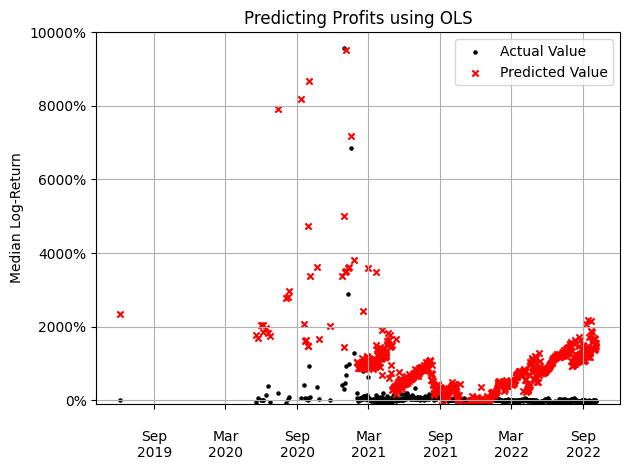

In [55]:
ax = (
    nft_trades.merge(mlr_diff, how="right", left_index=True, right_index=True)
    .groupby("sell_date")
    .median()
    .reset_index()
    .plot.scatter(
        y="Actual value",
        x="sell_date",
        marker=".",
        color="black",
        xlabel="",
        ylabel="Median Log-Return",
        title="Predicting Profits using OLS",
        ylim=(-1, 100),
    )
)
nft_trades.merge(mlr_diff, how="right", left_index=True, right_index=True).groupby(
    "sell_date"
).median().reset_index().plot.scatter(
    y="Predicted value",
    x="sell_date",
    marker="x",
    color="red",
    ax=ax,
    ylabel="Median Log-Return",
    xlabel="",
)
ax.xaxis.set_major_locator(mdates.MonthLocator([3, 9]))
ax.xaxis.set_major_formatter(mdates.DateFormatter("\n%b\n%Y"))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.grid()
plt.legend(["Actual Value", "Predicted Value"])
print(
    "Multiple Regression using Ordinary Least Squares \n"
    "Dependend Variable: Profits in USD \n"
    "Explaining Variables: Holding period, purchase price, ETH price \n"
)
print("R squared: {:.2f}".format(mlr.score(x, y) * 100))
print("Mean Absolute Error:", meanAbErr)
print("Mean Square Error:", meanSqErr)
print("Root Mean Square Error:", rootMeanSqErr)
plt.savefig("figures/regression.png")